# Plan Semilla Probability Project
### Group: Yulisa Niño, Miguel Granados, Juan Camilo Samiento

In [1]:
import pandas as pd
import numpy as np
import scipy
import os
import string
import unicodedata
import matplotlib.pyplot as plt
import math

Part 0: Exploration of dataset

In [2]:
ARES=pd.read_csv("ARES2_EJECUCION_ACTIVIDADES.csv",header=0)
ARES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52856 entries, 0 to 52855
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DESCRIPCION     52856 non-null  object 
 1   CODIGO_ETAPA    52855 non-null  object 
 2   DURACION_HORAS  52856 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


In [3]:
ARES1=ARES.copy()
ARES_counts=ARES1["CODIGO_ETAPA"].value_counts()
print(ARES_counts.head(13))

COCOD      20033
ERENT       4972
APEJE       2884
APSEG       1909
PRSIS       1687
ASEJE       1395
COAJU       1370
EMPALME     1201
COREV       1177
ASSEG       1141
COPRU       1127
CAPRO       1124
AQREQ        913
Name: CODIGO_ETAPA, dtype: int64


In [4]:
codes_count=list(ARES_counts.index)
codes_count=codes_count[3:13]
print(codes_count)

['APSEG', 'PRSIS', 'ASEJE', 'COAJU', 'EMPALME', 'COREV', 'ASSEG', 'COPRU', 'CAPRO', 'AQREQ']


In [5]:
ARES2=ARES.copy()
ARES2.drop(["DESCRIPCION"],axis=1,inplace=True)
ARES2=ARES2.groupby(["CODIGO_ETAPA"]).mean()
ARES2=ARES2.sort_values(by=["DURACION_HORAS"],axis=0,ascending=False)
print(ARES2.head(13))

              DURACION_HORAS
CODIGO_ETAPA                
SOPER               8.000000
LICMAT              8.000000
VAC                 7.875000
ELECT               7.771429
QUIN                7.750000
INCAP               7.687158
LICREM              7.611111
COMPE               7.000000
ELAPRO              3.909091
LIBRE               3.857143
SOCIN               3.500000
CERT                3.500000
SOPAR               3.448276


In [6]:
ARES2.drop(index="VAC",inplace=True)
codes_sum=list(ARES2.index)
codes_sum=codes_sum[1:11]
print(codes_sum)

['LICMAT', 'ELECT', 'QUIN', 'INCAP', 'LICREM', 'COMPE', 'ELAPRO', 'LIBRE', 'SOCIN', 'CERT']


In [7]:
ARES3=ARES.copy()
codes=codes_count   #selection of the 10 codes used throughout the project
ARES3=ARES3[ARES3["CODIGO_ETAPA"].isin(codes)]   #filter the table in order to have only data from the 10 codes
#print(ARES3.head(15))
ARES3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13044 entries, 10 to 52848
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DESCRIPCION     13044 non-null  object 
 1   CODIGO_ETAPA    13044 non-null  object 
 2   DURACION_HORAS  13044 non-null  float64
dtypes: float64(1), object(2)
memory usage: 407.6+ KB


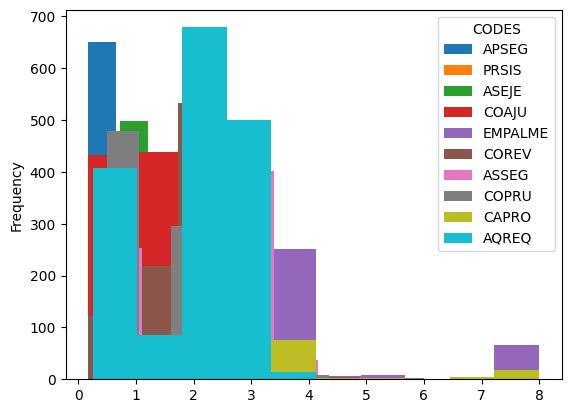

In [8]:
ARES_hist=ARES3.copy()
ARES_hist.groupby(["CODIGO_ETAPA"])["DURACION_HORAS"].plot(kind='hist')
plt.legend(codes,title="CODES")

Part 1: Classification of CODE based in DESCRIPTION

In [9]:
def mergeDictionary(dict_1, dict_2):
   dict_3 = {**dict_1, **dict_2}
   for key, value in dict_3.items():
       if key in dict_1 and key in dict_2:
               dict_3[key] = value + dict_1[key]
   return dict_3

def strip_accents(s):
   return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')

def count_chars(words,punctuation=False):
    characters=string.ascii_lowercase
    words=strip_accents(words.lower())
    if punctuation:
        characters=string.digits+string.ascii_lowercase+string.punctuation
        #characters=string.printable
    counter={}
    for letter in characters:
        counter[letter]=words.count(letter)
    characters=string.ascii_lowercase #to get back only characters w/o punctuation
    return counter

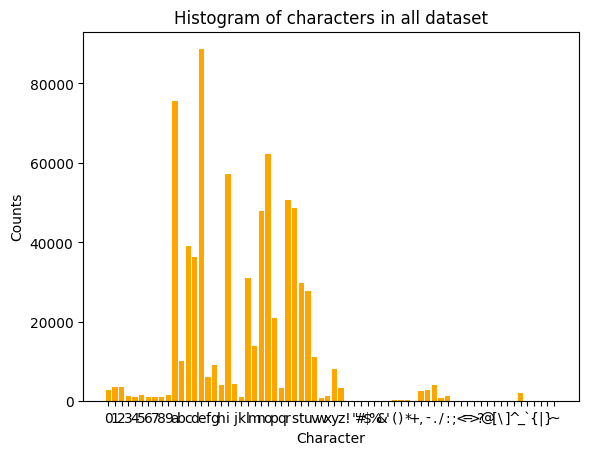

In [10]:
dictionary={}
for line in ARES3["DESCRIPCION"]:
    dictionary=mergeDictionary(dictionary,count_chars(line,True))
plt.figure()
plt.bar(range(len(dictionary)), dictionary.values(), align='center', color="orange")
plt.xticks(range(len(dictionary)), list(dictionary.keys()))
plt.ylabel("Counts")
plt.xlabel("Character")
plt.title("Histogram of characters in all dataset")
plt.show()

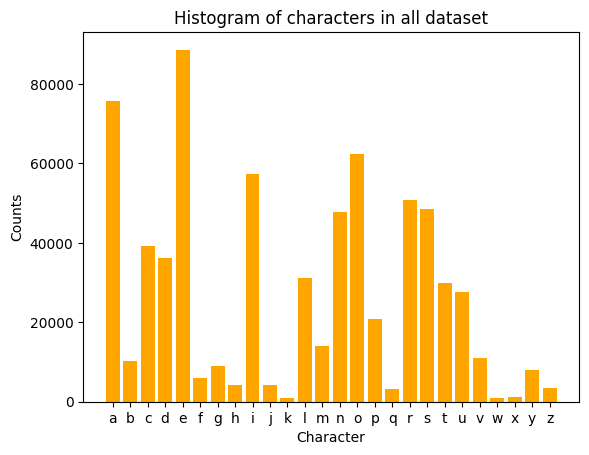

In [11]:
dictionary={}
for line in ARES3["DESCRIPCION"]:
    dictionary=mergeDictionary(dictionary,count_chars(line,False))
plt.figure()
plt.bar(range(len(dictionary)), dictionary.values(), align='center', color="orange")
plt.xticks(range(len(dictionary)), list(dictionary.keys()))
plt.ylabel("Counts")
plt.xlabel("Character")
plt.title("Histogram of characters in all dataset")
plt.show()

In [12]:
def bigram_extraction(text):
    bigrams = []
    for i in range(len(text) - 1):
        bigrams.append((text[i], text[i + 1]))
    return bigrams


def bigramsMatrix(bigrams):
    characters=string.ascii_lowercase
    matrix= np.zeros((len(characters), len(characters)))
    for bigram in bigrams:
        i, j = characters.index(bigram[0]), characters.index(bigram[1])
        matrix[i][j] += 1
    return matrix

In [13]:
ARES0=ARES3.copy()
ARES_Test=ARES0.sample(frac=0.2,random_state=0)
ARES_Train=ARES0.drop(ARES_Test.index)
print(f"No. of training samples: {ARES_Train.shape[0]}")
print(f"No. of testing samples: {ARES_Test.shape[0]}")

No. of training samples: 10435
No. of testing samples: 2609


In [14]:
joint_mx=[]
for code in codes:
    ARES_COPY=ARES_Train.copy()
    ARES_COPY=ARES_COPY[ARES_COPY["CODIGO_ETAPA"].isin([code])]
    characters=string.ascii_lowercase
    matrix=np.zeros((len(characters), len(characters)))
    for line in ARES_COPY["DESCRIPCION"]:
        line=strip_accents(line.lower())
        line="".join(filter(str.isalpha,line))
        bigrams=bigram_extraction(line)
        matrix=matrix+bigramsMatrix(bigrams)
    matrix_normal=matrix/np.sum(matrix)
    joint_mx.append((matrix_normal,code))

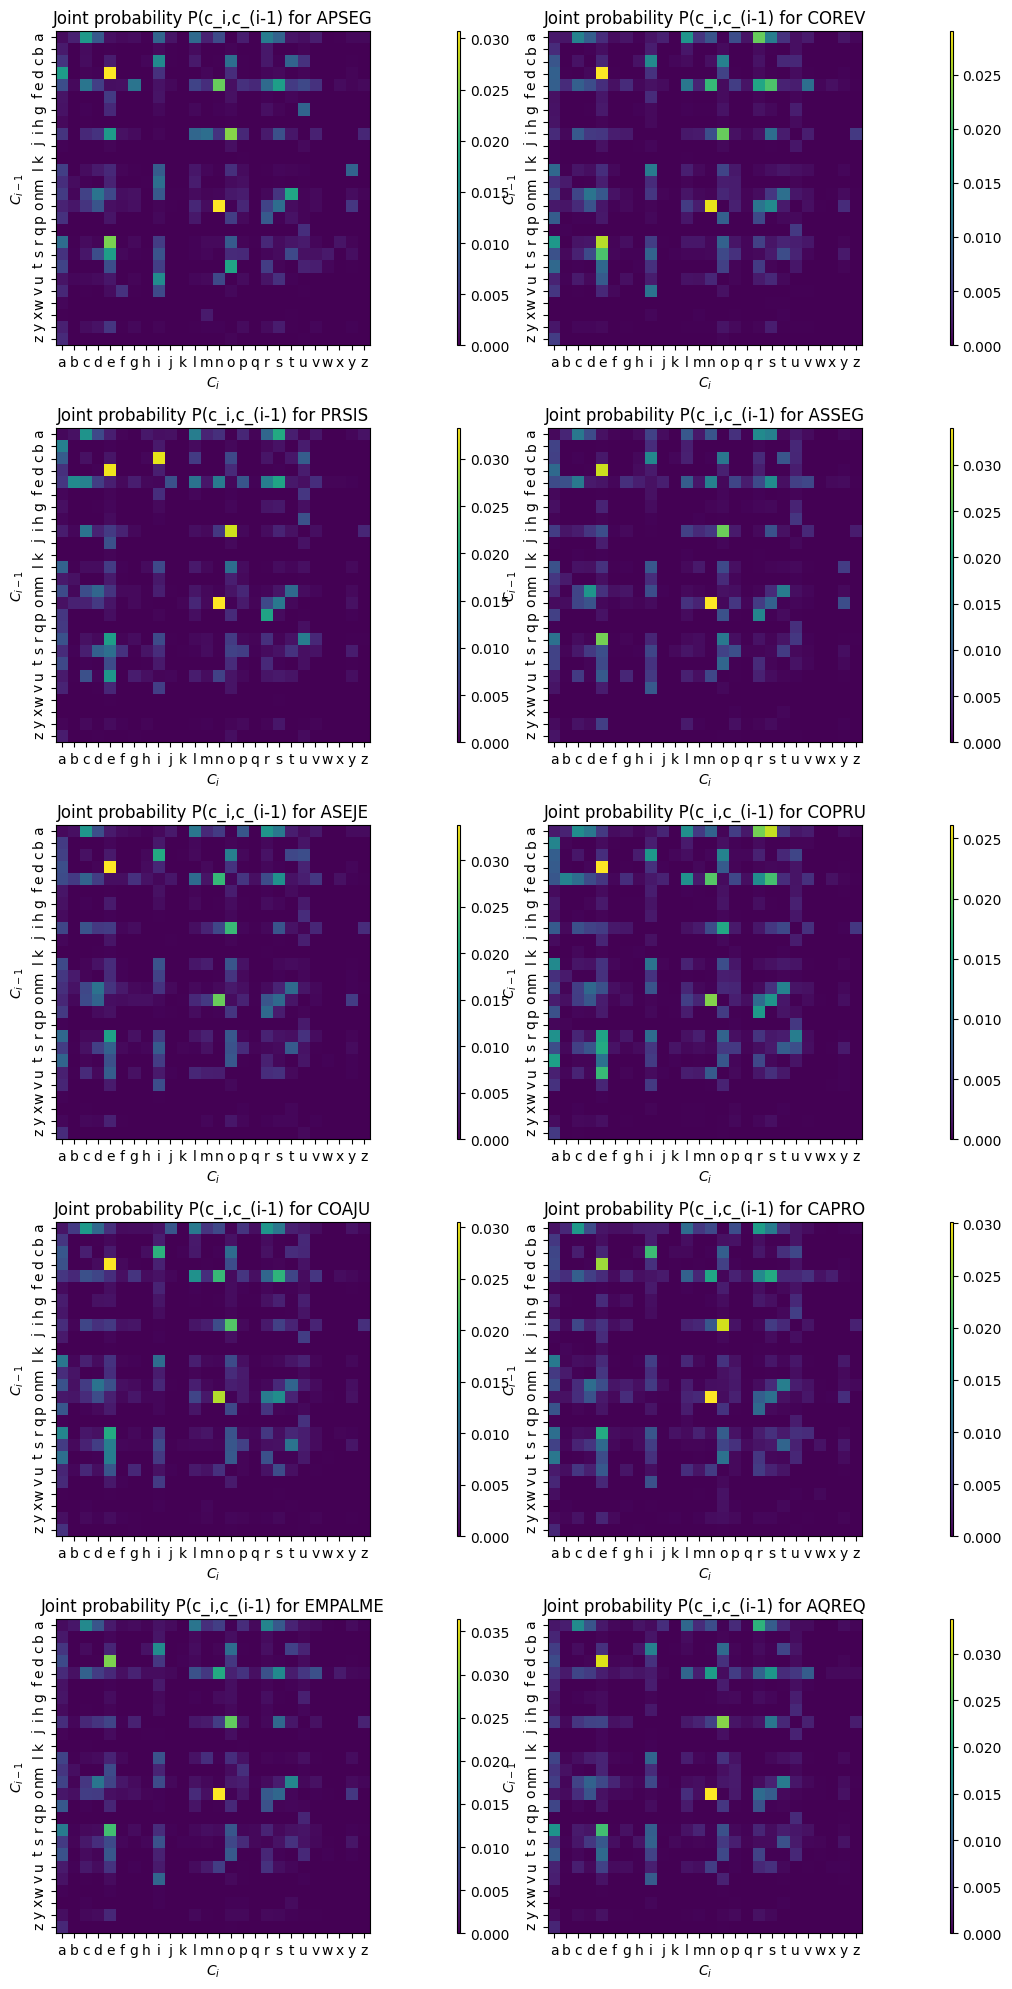

In [15]:
def show_2d_histograms(mega_mx):
    fig,ax=plt.subplots(5,4,gridspec_kw={'width_ratios': [1, 0.0085,1, 0.0085], 'height_ratios': [1,1,1,1,1]},figsize=(10,20))
    for ind, item in enumerate(mega_mx):
        if ind/5<1.0:
            ind_mt=0
            ind_clbr=1
        else:
            ind_mt=2
            ind_clbr=3
        im=ax[ind%5,ind_mt].imshow(item[0])
        plt.colorbar(im,cax=ax[ind%5,ind_clbr])
        ax[ind%5,ind_mt].set_xlabel("$C_{i}$")
        ax[ind%5,ind_mt].set_xticks(np.arange(len(characters)))
        ax[ind%5,ind_mt].set_xticklabels(characters)
        ax[ind%5,ind_mt].set_ylabel("$C_{i-1}$")
        ax[ind%5,ind_mt].set_yticks(np.arange(len(characters)))
        ax[ind%5,ind_mt].set_yticklabels(characters,rotation=90)
        ax[ind%5,ind_mt].set_title(f"Joint probability P(c_i,c_(i-1) for {item[1]}")
    plt.tight_layout()

# rows = c_i-1, columns = c_i    
show_2d_histograms(joint_mx)

In [16]:
def likelihood(new_seq,p):
    res=1.0
    for char in new_seq:
        if char in characters:
            res=res*p[char]
            #print(res)
    return res

def log_likelihood(new_seq,p):
    res=0.0
    for char in new_seq:
        if char in characters:     #   "#" pasa,  "c" entra
            res=res+np.log(p[char])   #np.log(meta_joint(c_i,c_1-1))
            #print(char,"log_likelihood",res,"P(X)",p[char],sep=",")
    return res

def log_likelihood2(new_seq,p):
    res=0.0
    for char1,char2 in zip(new_seq[:-1],new_seq[1:]):
        res=res+np.log(p[characters.index(char1),characters.index(char2)])
        "print(char1, char2, p[characters.index(char1),characters.index(char2)], res)"
    return res  

In [17]:
def predict(words):
    words="".join(filter(str.isalpha,words))
    words=strip_accents(words.lower())
    list_predict=[]
    for matr in joint_mx:   #joint_mx=[(mtx0,name0),(mtx1,name1),...,(mtxn,namen)]
        list_predict.append((log_likelihood2(words,matr[0]),matr[1]))
    prediction=max(list_predict,key=lambda item:item[0])[1]   #str (name)
    return prediction

def test():
    dict_predict0={}
    dict_predict1={}
    characters=string.ascii_lowercase
    for code in codes:
        ARES_COPY=ARES_Test.copy()
        ARES_COPY=ARES_COPY[ARES_COPY["CODIGO_ETAPA"].isin([code])]
        for line in ARES_COPY["DESCRIPCION"]:
            line=strip_accents(line.lower())
            line="".join(filter(str.isalpha,line))
            res_predict=predict(line)
            dict_predict1[res_predict] = dict_predict1.get(res_predict, 0) + 1
        dict_predict0[code]=dict_predict1.copy()
    #print(dict_predict0)
    return dict_predict0
    

In [18]:
def accuracies(dict_predictions):
    for key,predictions in dict_predictions.items():
        good=predictions[key]
        total=sum(predictions.values())
        acc=good/total
        print(f"Accuracy: {acc}; Classified {good} of {total} samples for code {key}")


In [19]:
test_results=test()
accuracies(test_results)

C:\Users\ynino\AppData\Local\Temp\ipykernel_9192\2529350289.py:20: RuntimeWarning: divide by zero encountered in log
  res=res+np.log(p[characters.index(char1),characters.index(char2)])


Accuracy: 0.6784741144414169; Classified 249 of 367 samples for code APSEG
Accuracy: 0.3211267605633803; Classified 228 of 710 samples for code PRSIS
Accuracy: 0.14836795252225518; Classified 150 of 1011 samples for code ASEJE
Accuracy: 0.1388888888888889; Classified 175 of 1260 samples for code COAJU
Accuracy: 0.14735432016075017; Classified 220 of 1493 samples for code EMPALME
Accuracy: 0.12037037037037036; Classified 208 of 1728 samples for code COREV
Accuracy: 0.0752797558494405; Classified 148 of 1966 samples for code ASSEG
Accuracy: 0.10218978102189781; Classified 224 of 2192 samples for code COPRU
Accuracy: 0.0690505548705302; Classified 168 of 2433 samples for code CAPRO
Accuracy: 0.09812188577999234; Classified 256 of 2609 samples for code AQREQ


Part 2: Probability of time spent in task

In [20]:
def plot_fits(values, fits,codigos, fit_color='C1'):
    fig = plt.figure(figsize=(10,10))
    xs = np.linspace(-1.0,8.0,1000)
    for i,(value,fit,code) in enumerate(zip(values, fits, codigos)):
        ax = fig.add_subplot(5,2,i+1)
        ax.bar(value[0], value[1], align='center')
        ax.plot(xs, scipy.stats.gamma.pdf(xs,fit[0],fit[1],fit[2]), color=fit_color, lw=1)  #fit[0]=a,fit[1]=loc,fit[2]=scale
        # set labeling and axis
        ax.set_xlabel("Hours")
        ax.set_ylabel("Count")
        ax.set_title(code)
    plt.tight_layout()

In [21]:
list_curves=[]
list_counts=[]
distributions=['gamma','norm','burr']
# fit_alpha,fit_loc,fit_beta=scipy.stats.gamma.fit()
for code in codes:
    ARES_COPY=ARES3.copy()
    ARES_COPY=ARES_COPY[ARES_COPY["CODIGO_ETAPA"].isin([code])]  #Filters table by code
    ARES_COPY_counts=ARES_COPY["DURACION_HORAS"].value_counts()
    list_counts.append((list(ARES_COPY_counts.index),list(ARES_COPY_counts.values/np.sum(ARES_COPY_counts))))
    fit_alpha,fit_loc,fit_scale=scipy.stats.gamma.fit(ARES_COPY["DURACION_HORAS"])  #Fits with all raw data
    list_curves.append((fit_alpha,fit_loc,fit_scale))

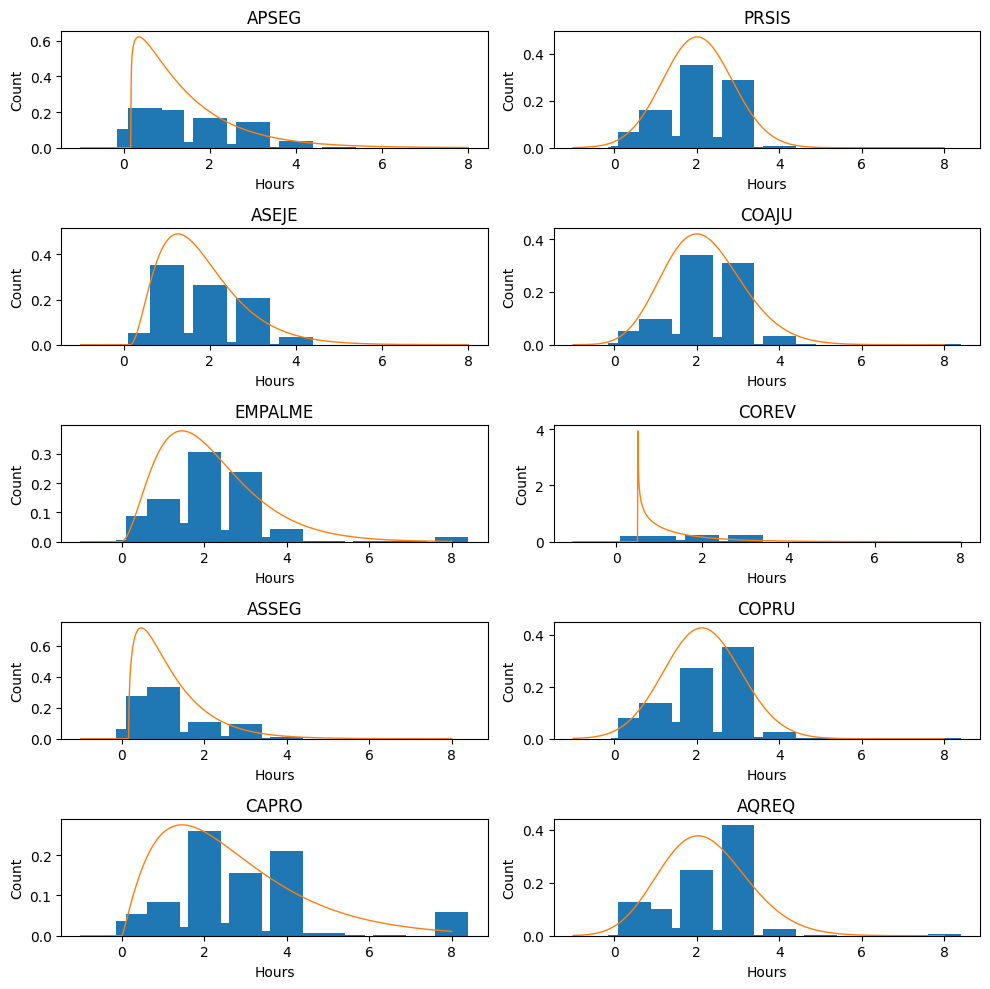

In [22]:
plot_fits(list_counts, list_curves, codes, fit_color='C1')

In [23]:
def probability(etapa,value,condition=None): #value: n or (n,n), condition: less_equal,more,range, etapa:codigo
    index=codes.index(etapa)
    a,loc,scale=list_curves[index]
    if type(value)!=type((0,0)):  #checks for tuple indicating its a range
        #its only a value, then check for conditional
        if condition=="less_equal" or condition=="less" or condition=="equal":
            proba=scipy.stats.gamma.cdf(value,a,loc,scale)
        if condition=="more":
            proba=1-scipy.stats.gamma.cdf(value,a,loc,scale)
        if condition=="range":
            return "error"
    else:       #its a tuple, must claculate over range
        if condition is not None:
            if condition != "range":
                return "error"
        proba=scipy.stats.gamma.cdf(max(value),a,loc,scale)-scipy.stats.gamma.cdf(min(value),a,loc,scale)
    return proba

In [24]:
codes2=codes
for code in codes2[0:5]:
    print(code,probability(code,(3,4),"more"))
    print(code,probability(code,3,"range"))
    print(code,probability(code,3,"more"))
    print(code,probability(code,3,"less"))

APSEG error
APSEG error
APSEG 0.09894633719264578
APSEG 0.9010536628073542
PRSIS error
PRSIS error
PRSIS 0.12563884229577993
PRSIS 0.8743611577042201
ASEJE error
ASEJE error
ASEJE 0.11200404563206123
ASEJE 0.8879959543679388
COAJU error
COAJU error
COAJU 0.1919675596755388
COAJU 0.8080324403244612
EMPALME error
EMPALME error
EMPALME 0.21143833584005722
EMPALME 0.7885616641599428


In [25]:
for code in codes2[5:10]:
    print(code,probability(code,(3,4),"more"))
    print(code,probability(code,3,"range"))
    print(code,probability(code,3,"more"))
    print(code,probability(code,3,"less"))

COREV error
COREV error
COREV 0.061181985669597205
COREV 0.9388180143304028
ASSEG error
ASSEG error
ASSEG 0.04356290077852387
ASSEG 0.9564370992214761
COPRU error
COPRU error
COPRU 0.1810080180641177
COPRU 0.8189919819358823
CAPRO error
CAPRO error
CAPRO 0.3534153179023303
CAPRO 0.6465846820976697
AQREQ error
AQREQ error
AQREQ 0.2202127457463683
AQREQ 0.7797872542536317


# Conclusions

* The classification results based on the joint probability of consecutive characters being different for each description show that this characteristic is not the best to differentiante them due to simmilarities in the language used.

* In part 2, from the 10 codes selected, the distributions were fairly similar, following a gamma type distribution. There was only a difference with the code COREV, which did not had a good fitting to the gamma distribution.

* Probabilities are easily calculated when using the cdf of the distribution, taking into account it avoids a long process of integration.

# Opportunities for improvement

* Partitions of train-test split for part 1.

* Find the best distribution rather than "eye" it.


Part 3: Trigram

Ok, mates, so you will perform additional tasks that I want you to put at the end of the notebook. Do not change what you have already done. Just create a new section at the end. Use ALL the data provided (or a reasonable chunk for computational reasons) to implement the following. 0. Build a trigram model that takes into account order. Example: 'I love plan semilla' Trigrams: (I sp l) (sp lo) (lov) (ove) ... Probabilities: P(v | o, l), P(e | v, o) ... (order matters!) (Notice that you need to have some special characters that are crucial for well-written sentences) 
1. Build a function that generates a piece of text given the distribution you found. (You'll have to build a sampling procedure to sample characters from your distribution). 
2. Asses intuitively how good or bad is your generative model. Does it generate different things from a random procedure?

The function that generates text should have an input parameter that establishes the length of the generated text.

In [26]:
ARES3=ARES.copy()
codes=codes_count   #selection of the 10 codes used throughout the project
ARES3=ARES3[ARES3["CODIGO_ETAPA"].isin(codes)]   #filter the table in order to have only data from the 10 codes
#print(ARES3.head(15))
ARES3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13044 entries, 10 to 52848
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DESCRIPCION     13044 non-null  object 
 1   CODIGO_ETAPA    13044 non-null  object 
 2   DURACION_HORAS  13044 non-null  float64
dtypes: float64(1), object(2)
memory usage: 407.6+ KB


In [27]:
def trigram_extraction(text):
    trigrams = []
    for i in range(len(text) - 2):
        trigrams.append((text[i:i+2], text[i + 2]))
    return trigrams
def trigramsMatrix(trigrams):
    characters=string.ascii_lowercase+string.punctuation+string.whitespace
    char_pair=[]
    for char1 in characters:
        for char2 in characters:
            char_pair.append(char1+char2)
    size_char=len(characters)
    matrix = np.zeros((size_char*size_char, size_char))
    for trigram in trigrams:
        i, j = char_pair.index(trigram[0]), characters.index(trigram[1])
        matrix[i][j] += 1
    return matrix



In [28]:
print(trigram_extraction("hola como estas"))

[('ho', 'l'), ('ol', 'a'), ('la', ' '), ('a ', 'c'), (' c', 'o'), ('co', 'm'), ('om', 'o'), ('mo', ' '), ('o ', 'e'), (' e', 's'), ('es', 't'), ('st', 'a'), ('ta', 's')]


In [29]:
trigram_test=trigramsMatrix(trigram_extraction("aaaaabcde"))
print(trigram_test[:5,:5])

[[3. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [30]:
ARES_COPY=ARES3.copy()
characters=string.ascii_lowercase+string.punctuation+string.whitespace
size_char=len(characters)
matrix_tri=np.zeros((size_char*size_char, size_char))
for line in ARES_COPY["DESCRIPCION"]:
    #print(line)
    line=strip_accents(line.lower())
    line="".join(map(lambda c: c if c in characters else '',line))
    matrix_tri=matrix_tri+trigramsMatrix(trigram_extraction(line))
matrix_tri_normal=matrix_tri/np.sum(matrix_tri)


In [31]:
marg_c1=np.sum(matrix_tri_normal, axis=0)
marg_c23=np.sum(matrix_tri_normal, axis=1)

In [32]:
conditional_tri=(matrix_tri_normal.T/marg_c23).T

C:\Users\ynino\AppData\Local\Temp\ipykernel_9192\1006350289.py:1: RuntimeWarning: invalid value encountered in divide
  conditional_tri=(matrix_tri_normal.T/marg_c23).T


In [33]:
#np.nanmax for max ignoring nan's

def gen_chars(initial,length):
    if len(initial)<2:    #checks for errors in function parameters
        print("error")
        return
    char_pair=[]
    for char1 in characters:
        for char2 in characters:
            char_pair.append(char1+char2)        #list of character pairs to have the row index for matrix
    index_pair=char_pair.index(initial[-2:])
    while length>0:                               # loop until length of generated characters is met
        max=-np.inf                            
        for i,letter in enumerate(characters):
            value=conditional_tri[index_pair][i]    #compare value to current max for the row selected
            if not math.isnan(value):
                if value>max:
                    max=value
                    ind_max=i
        generated=characters[ind_max]
        initial=initial+generated
        index_pair=char_pair.index(initial[-2:])
        length=length-1
    
    return initial

In [34]:
print(gen_chars('cocinar',200))

cocinara de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de de 
